In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

# Classifier model candidates
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, f_regression, chi2

In [3]:
def get_best_model_and_accuracy(model, params, X, y, info=''):
    '''perform GridSearchCV from the given parameters
    and display the following results:
        - best accuracy
        - best parameter
        - average training time
        - average prediction time
    '''
    # searching for the best model
    grid = GridSearchCV(model, params, error_score=0.0)
    grid.fit(X, y)
    
    # display the results
    name = model.__class__.__name__
    if info:
        print("{} ({}):".format(name, info))
        print('-' * (len(name) + len(info) + 3))
    else:
        print(name + ":")
        print('-'*len(name))
    print("Best Accuracy: {:.4f}".format(grid.best_score_))
    print("Best Parameters: {}".format(grid.best_params_))
    print("Average Training Time (s): {:.3f}".format(grid.cv_results_['mean_fit_time'].mean()))
    print("Average Prediction Time (s): {:.3f}".format(grid.cv_results_['mean_score_time'].mean()))

In [12]:
credit_card_default = pd.read_csv('data/credit_card_default.csv')

In [7]:
credit_card_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
credit_card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [14]:
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [12]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
credit_card_default.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

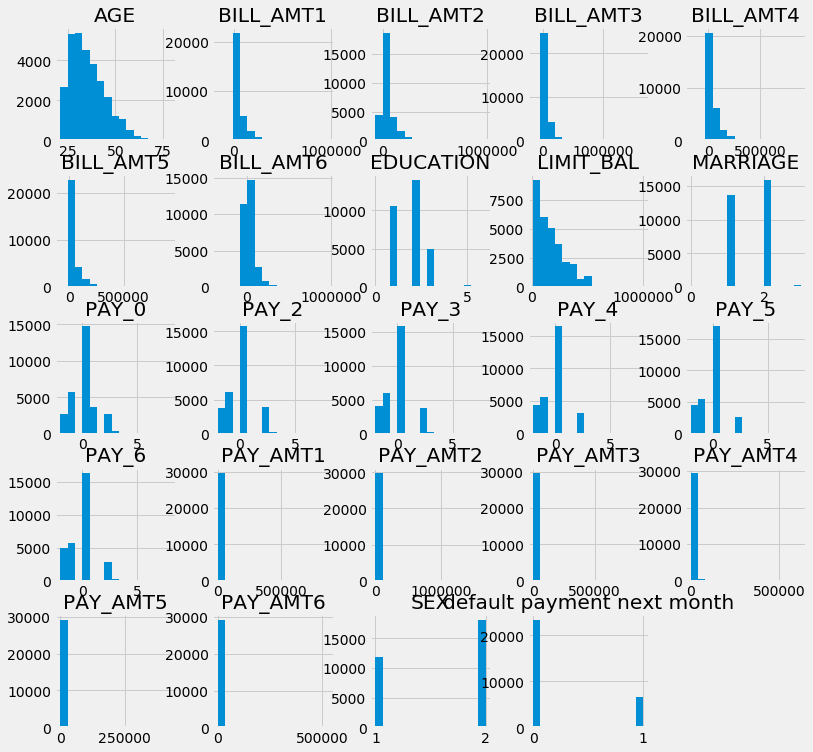

In [16]:
_ = credit_card_default.hist(figsize=(12, 12), bins=15)

In [13]:
y = credit_card_default['default payment next month']
X = credit_card_default.drop('default payment next month', axis=1)

X.shape, y.shape

((30000, 23), (30000,))

In [18]:
# null accuracy rate -> 77.88 %
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

#### Creating a baseline machine learning pipeline

In [39]:
# set up some parameters for grid search
lr_params = {
    'C': [1e-1, 1e0, 1e1, 1e2],
    'penalty': ['l1', 'l2'],
}

knn_params = {
    'n_neighbors': [1, 3, 5, 7],
}

knn_pipe_params = {
    'classifier__n_neighbors': [1, 3, 5, 7],
}

tree_params = {
    'max_depth': [None, 1, 3, 5, 7],
}

rf_params = {
    'max_depth': [None, 1, 3, 5, 7],
    'n_estimators': [10, 50, 100],
}


In [38]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier()),
])

In [31]:
get_best_model_and_accuracy(LogisticRegression(), lr_params, X, y, info='baseline')

LogisticRegression (baseline):
-----------------------------
Best Accuracy: 0.8095
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Average Training Time (s): 1.245
Average Prediction Time (s): 0.005


In [33]:
get_best_model_and_accuracy(KNeighborsClassifier(), knn_params, X, y, info='baseline')

KNeighborsClassifier (baseline):
-------------------------------
Best Accuracy: 0.7602
Best Parameters: {'n_neighbors': 7}
Average Training Time (s): 0.097
Average Prediction Time (s): 1.664


In [40]:
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y, info='std + knn')

Pipeline (std + knn):
--------------------
Best Accuracy: 0.8008
Best Parameters: {'classifier__n_neighbors': 7}
Average Training Time (s): 0.134
Average Prediction Time (s): 14.139


In [34]:
get_best_model_and_accuracy(DecisionTreeClassifier(), tree_params, X, y, info='baseline')

DecisionTreeClassifier (baseline):
---------------------------------
Best Accuracy: 0.8203
Best Parameters: {'max_depth': 3}
Average Training Time (s): 0.364
Average Prediction Time (s): 0.004


In [35]:
get_best_model_and_accuracy(RandomForestClassifier(), rf_params, X, y, info='baseline')

RandomForestClassifier (baseline):
---------------------------------
Best Accuracy: 0.8194
Best Parameters: {'max_depth': 7, 'n_estimators': 10}
Average Training Time (s): 2.419
Average Prediction Time (s): 0.115


#### Statistical-based feature selection
* Pearson correlation
* hypothesis testing

In [41]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


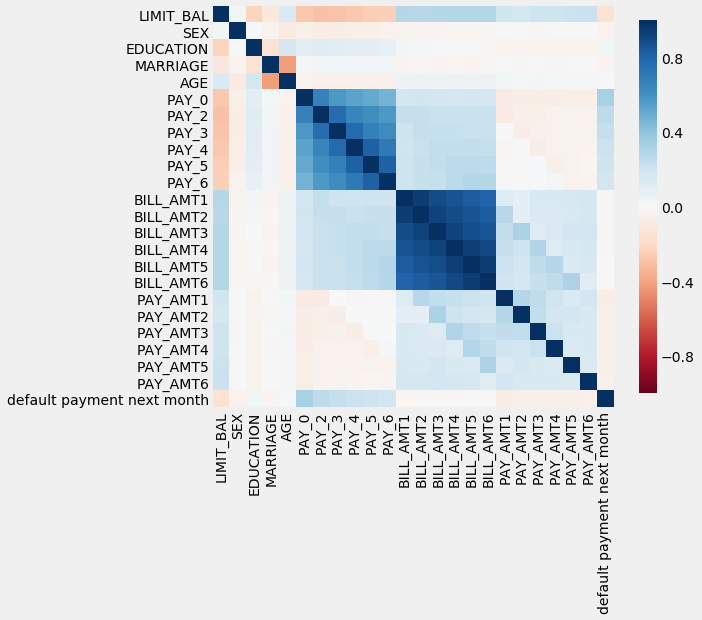

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(credit_card_default.corr(), annot=False, square=True, cbar_kws={'shrink': .8}, 
            cmap=plt.cm.RdBu, vmin=-1, vmax=1, ax=ax)

In [44]:
credit_card_default.corr()['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [45]:
high_corr_features = credit_card_default.corr()['default payment next month'].abs() > 0.2

In [48]:
high_corr_features = credit_card_default.columns[high_corr_features.values][:-1]
high_corr_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [51]:
X_subsetted = X[high_corr_features]
X_subsetted.shape

(30000, 5)

In [53]:
get_best_model_and_accuracy(DecisionTreeClassifier(), tree_params, X_subsetted, y, 'only |corr| > .2')

DecisionTreeClassifier (only |corr| > .2):
-----------------------------------------
Best Accuracy: 0.8197
Best Parameters: {'max_depth': 3}
Average Training Time (s): 0.017
Average Prediction Time (s): 0.003


In [56]:
class CustomCorrelationSelector(TransformerMixin, BaseEstimator):
    
    def __init__(self, response, threshold=None, cols_to_keep=None):
        self.response = response
        self.threshold = threshold
        self.cols_to_keep = cols_to_keep
        
    def fit(self, X, y=None):
        df = pd.concat([X, self.response], axis=1, join='inner')
        cols = df.columns[df.corr().iloc[:, -1].abs() > self.threshold]
        self.cols_to_keep = [c for c in cols if c in X.columns]
        return self
    
    def transform(self, X):
        return X[self.cols_to_keep]

In [57]:
ccs = CustomCorrelationSelector(response=y, threshold=0.2)

In [59]:
ccs = ccs.fit(X)

In [60]:
ccs.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [61]:
ccs.transform(X).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [62]:
# pipeline -> custom_correlation_selector + DecisionTree

ccs_pipe = Pipeline([
    ('ccs', CustomCorrelationSelector(response=y)),
    ('classifier', DecisionTreeClassifier()),
])

ccs_params = {
    'classifier__max_depth': [None, 1, 3, 5, 7],
    'ccs__threshold': [0, .1, .2, .3],
}

get_best_model_and_accuracy(ccs_pipe, ccs_params, X, y, info='corr-selector + tree')

Pipeline (corr-selector + tree):
-------------------------------
Best Accuracy: 0.8206
Best Parameters: {'classifier__max_depth': 5, 'ccs__threshold': 0.1}
Average Training Time (s): 0.198
Average Prediction Time (s): 0.005


In [64]:
ccs = CustomCorrelationSelector(threshold=.1, response=y)
ccs.fit(X)
ccs.cols_to_keep

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#### Feature selection using hypothesis testing

In [66]:
k_best = SelectKBest(f_classif, k=5)

In [67]:
k_best.fit(X, y)

SelectKBest(k=5, score_func=<function f_classif at 0x0000028C2BCF2510>)

In [74]:
k_best.pvalues_

array([1.30224395e-157, 4.39524880e-012, 1.22503803e-006, 2.48536389e-005,
       1.61368459e-002, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.89929659e-315, 1.12660795e-279, 7.29674048e-234, 6.67329549e-004,
       1.39573624e-002, 1.47699827e-002, 7.85556416e-002, 2.41634443e-001,
       3.52122521e-001, 1.14648761e-036, 3.16665676e-024, 1.84177029e-022,
       6.83094160e-023, 1.24134477e-021, 3.03358907e-020])

In [75]:
df = pd.DataFrame({'features': X.columns, 'pvalues': k_best.pvalues_})

In [78]:
df.sort_values(by='pvalues').head(10)

,features,pvalues
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157
17,PAY_AMT1,1.146488e-36
18,PAY_AMT2,3.166657e-24
20,PAY_AMT4,6.830942e-23


In [83]:
df.query('pvalues >= 0.05')

,features,pvalues
14,BILL_AMT4,0.078556
15,BILL_AMT5,0.241634
16,BILL_AMT6,0.352123


In [86]:
# apply SelectKBest to our pipeline

kbest_pipe = Pipeline([
    ('kbest', SelectKBest(f_classif)),
    ('classifier', DecisionTreeClassifier()),
])

kbest_params = {
    'classifier__max_depth': [None, 1, 3, 5, 7],
    'kbest__k': range(1, X.shape[1], 2)
}

get_best_model_and_accuracy(kbest_pipe, kbest_params, X, y, info='kbest + tree')

Pipeline (kbest + tree):
-----------------------
Best Accuracy: 0.8206
Best Parameters: {'classifier__max_depth': 5, 'kbest__k': 7}
Average Training Time (s): 0.147
Average Prediction Time (s): 0.005


In [91]:
# 7 selected features
df.query('pvalues <= 0.05').sort_values(by='pvalues').head(7)

,features,pvalues
7,PAY_3,0.000000e+00
6,PAY_2,0.000000e+00
5,PAY_0,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157


In [94]:
non_selected_kbest = df.sort_values(by='pvalues')['features'][7:].values
non_selected_kbest

array(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT5',
       'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'AGE', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'], dtype=object)

In [95]:
get_best_model_and_accuracy(DecisionTreeClassifier(), tree_params, 
                            X[non_selected_kbest], y, info='non-kbest, expected bad accuracy')

DecisionTreeClassifier (non-kbest, expected bad accuracy):
---------------------------------------------------------
Best Accuracy: 0.7839
Best Parameters: {'max_depth': 5}
Average Training Time (s): 0.316
Average Prediction Time (s): 0.004


#### Tree-based model feature selection

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
importances = pd.DataFrame({'feature': X.columns, 
                            'importance': tree.feature_importances_}).sort_values(by='importance', ascending=False)

In [18]:
importances

,feature,importance
5,PAY_0,0.161772
4,AGE,0.071820
11,BILL_AMT1,0.067594
0,LIMIT_BAL,0.059942
19,PAY_AMT3,0.055610
16,BILL_AMT6,0.052902
18,PAY_AMT2,0.052200
12,BILL_AMT2,0.050730
17,PAY_AMT1,0.050063
22,PAY_AMT6,0.046637


In [20]:
selector = SelectFromModel(DecisionTreeClassifier(), threshold=.05)
selected_X = selector.fit_transform(X, y)

In [21]:
selected_X.shape

(30000, 7)

In [23]:
X.columns[selector.get_support()]

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT3'],
      dtype='object')

In [24]:
select_from_pipe = Pipeline([
    ('selector', SelectFromModel(DecisionTreeClassifier())),
    ('classifier', DecisionTreeClassifier()),
])

select_from_params = {
    'classifier__max_depth': [1, 3, 5, 7],
    'selector__threshold': [.01, .05, .1, .2, .3, .4, .5, 'mean', 'median', '2.*mean'],
    'selector__estimator__max_depth': [None, 1, 3, 5, 7],
}

get_best_model_and_accuracy(select_from_pipe, select_from_params, 
                            X, y, 'select_from_tree + tree')

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

Pipeline (select_from_tree + tree):
----------------------------------
Best Accuracy: 0.8203
Best Parameters: {'selector__estimator__max_depth': None, 'classifier__max_depth': 3, 'selector__threshold': 0.01}
Average Training Time (s): 0.399
Average Prediction Time (s): 0.003


In [28]:
select_from_pipe.set_params(**{'selector__estimator__max_depth': None,
                               'classifier__max_depth': 3,
                               'selector__threshold': 0.01})

Pipeline(memory=None,
     steps=[('selector', SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
         ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [31]:
select_from_pipe.steps[0][1].fit(X, y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        norm_order=1, prefit=False, threshold=0.01)

In [35]:
X.columns[select_from_pipe.steps[0][1].get_support()]

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

#### Linear models feature selection

In [36]:
regularization_pipe = Pipeline([
    ('selector', SelectFromModel(LogisticRegression())),
    ('classifier', DecisionTreeClassifier())
])

regularization_params = {
    'classifier__max_depth': [1,3,5,7],
    'selector__threshold': [.01, .05, .1, 'mean', 'median', '2.*mean'],
    'selector__estimator__penalty': ['l1', 'l2']
}

In [37]:
get_best_model_and_accuracy(regularization_pipe, regularization_params, 
                            X, y, 'linear_selector + tree')

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

Pipeline (linear_selector + tree):
---------------------------------
Best Accuracy: 0.8212
Best Parameters: {'selector__estimator__penalty': 'l1', 'classifier__max_depth': 5, 'selector__threshold': 0.01}
Average Training Time (s): 1.361
Average Prediction Time (s): 0.003


In [39]:
regularization_pipe.set_params(**{
    'selector__estimator__penalty': 'l1',
    'classifier__max_depth': 5,
    'selector__threshold': 0.01,
})

Pipeline(memory=None,
     steps=[('selector', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_st...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [40]:
regularization_pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('selector', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_st...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [43]:
X.columns[regularization_pipe.steps[0][1].get_support()]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5'],
      dtype='object')

In [49]:
svc_selector_pipe = Pipeline([
    ('selector', SelectFromModel(LinearSVC())),
    ('classifier', DecisionTreeClassifier()),
])

svc_selector_params = {
    'classifier__max_depth': [1, 3, 5, 7],
    'selector__threshold': [.01, .05, .1, 'mean', 'median', '2.*mean'],
    'selector__estimator__penalty': ['l1', 'l2'],
    'selector__estimator__loss': ['squared_hinge', 'hinge'],
    'selector__estimator__dual': [True, False]
}

In [50]:
get_best_model_and_accuracy(svc_selector_pipe, svc_selector_params, 
                            X, y, 'svc_selector + tree')

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (e

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be 

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Loca

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWar

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (e

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Loca

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWar

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (e

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Value

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWar

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (e

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(20000, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklear

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Loca

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False",)
  "Details: \n%r" % (error_score, e), FitFailedWar

Pipeline (svc_selector + tree):
------------------------------
Best Accuracy: 0.8214
Best Parameters: {'selector__estimator__loss': 'hinge', 'selector__estimator__penalty': 'l2', 'classifier__max_depth': 5, 'selector__threshold': 'median', 'selector__estimator__dual': True}
Average Training Time (s): 1.909
Average Prediction Time (s): 0.001


In [51]:
svc_selector_pipe.set_params(**{
    'selector__estimator__loss': 'hinge',
    'selector__estimator__penalty': 'l2',
    'classifier__max_depth': 5,
    'selector__threshold': 'median',
    'selector__estimator__dual': True
})

Pipeline(memory=None,
     steps=[('selector', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0),
        norm_order=1, prefit=False, threshold='medi...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [52]:
svc_selector_pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('selector', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0),
        norm_order=1, prefit=False, threshold='medi...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [55]:
X.columns[svc_selector_pipe.steps[0][1].get_support()]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT2', 'PAY_AMT5'],
      dtype='object')

In [57]:
# f-score, p-value
f_classif(X[['PAY_0']], y)

(array([3537.71496963]), array([0.]))

In [59]:
chi2(X[['SEX']], y)

(array([7.14636693]), array([0.0075116]))

In [61]:
f_regression(X[['SEX']], X['PAY_0'])

(array([100.0066915]), array([1.65328176e-23]))